In [207]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt 

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from scipy.stats import norm
from scipy import stats

In [178]:
path = '/Users/finntran/Downloads/Ames_Housing_Data1.tsv'
data = pd.read_csv(path,sep ='\t')
data

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
2,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
3,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
4,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2926,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2927,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2928,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2929,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


In [179]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2931 entries, 0 to 2930
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2931 non-null   int64  
 1   PID              2931 non-null   int64  
 2   MS SubClass      2931 non-null   int64  
 3   MS Zoning        2931 non-null   object 
 4   Lot Frontage     2441 non-null   float64
 5   Lot Area         2931 non-null   int64  
 6   Street           2931 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2931 non-null   object 
 9   Land Contour     2931 non-null   object 
 10  Utilities        2931 non-null   object 
 11  Lot Config       2931 non-null   object 
 12  Land Slope       2931 non-null   object 
 13  Neighborhood     2931 non-null   object 
 14  Condition 1      2931 non-null   object 
 15  Condition 2      2931 non-null   object 
 16  Bldg Type        2931 non-null   object 
 17  House Style   

In [180]:
data['SalePrice'].describe()
##house prices sold on average

count      2931.000000
mean     180807.729785
std       79875.557267
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [181]:
data['Sale Condition'].value_counts()
#

Sale Condition
Normal     2414
Partial     245
Abnorml     190
Family       46
Alloca       24
AdjLand      12
Name: count, dtype: int64

In [182]:
numeric_data = data.select_dtypes(include = ['float', 'int'])
round(numeric_data.corr(),2)
##find the highest correlations table with sales price
house_num = numeric_data.corr()['SalePrice'][:-1]
top_corr = house_num[abs(house_num) > 0.5]
top_corr.sort_values(ascending = False)
#Higher housing price we can observe to be associated with:
#The quality of the house is the highest, followed by the living area, garage cars and garage areas

Overall Qual      0.799226
Gr Liv Area       0.706791
Garage Cars       0.647891
Garage Area       0.640411
Total Bsmt SF     0.632270
1st Flr SF        0.621672
Year Built        0.558340
Full Bath         0.545339
Year Remod/Add    0.532664
Garage Yr Blt     0.526808
Mas Vnr Area      0.508277
Name: SalePrice, dtype: float64

Skewness of Sale Price: 1.743222


/var/folders/l7/n6_49wq50y5chmy25lb24n3m0000gn/T/ipykernel_50402/2863864587.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['SalePrice'])


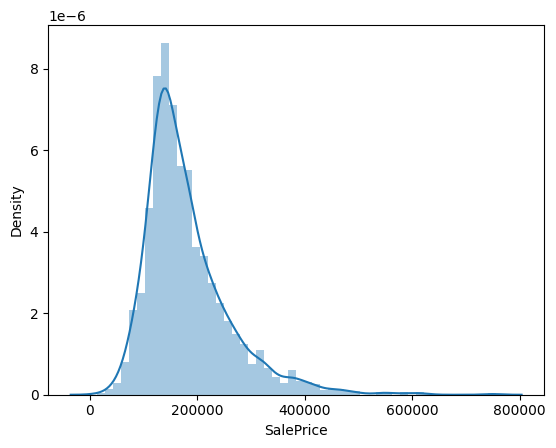

In [183]:
sns.distplot(data['SalePrice'])
print("Skewness of Sale Price: %f" % data['SalePrice'].skew())
##distribution of right skewness with a strong right tail.
##skewness variable of 1.74, with values > abs(1) is high skewness. 

Skewness: -0.015354


/var/folders/l7/n6_49wq50y5chmy25lb24n3m0000gn/T/ipykernel_50402/2498145237.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(log_transformed)


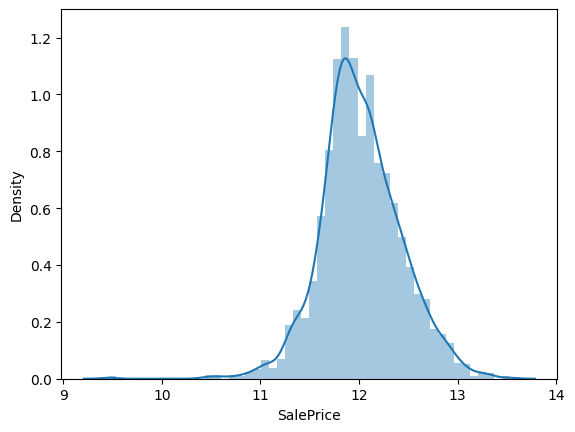

In [184]:
log_transformed = np.log(data['SalePrice'])
sns.distplot(log_transformed)
print("Skewness: %f" % log_transformed.skew())

In [185]:
##Handling missing data with in the dataset
data.isna().sum()

Order               0
PID                 0
MS SubClass         0
MS Zoning           0
Lot Frontage      490
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 82, dtype: int64

In [186]:
data.drop_duplicates(inplace = True) ##removes duplicate

<Axes: >

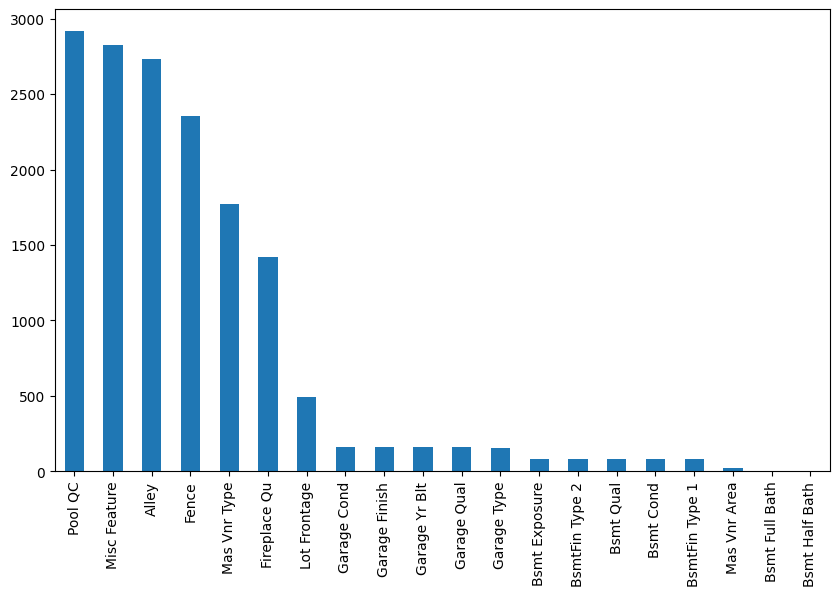

In [187]:
total_empty = data.isnull().sum().sort_values(ascending = False)
total_selected = total_empty.head(20)
total_selected.plot(kind="bar", figsize = (10,6), fontsize = 10)
#list of empty data in a set 

In [188]:
data.drop('Pool QC', axis = 1, inplace = True)
##Pool QC virtually contains all missing values, therefore drop the entire column 

In [ ]:
median = data['Lot Frontage'].median()
data['Lot Frontage'].fillna(median, inplace = True)

np.int64(0)

In [ ]:
data.drop("Alley", axis = 1, inplace = True)

KeyError: "['Alley'] not found in axis"

In [209]:
norm_data = MinMaxScaler().fit_transform(numeric_data)
norm_data

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        3.63636364e-01, 1.00000000e+00, 2.72444089e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        3.63636364e-01, 1.00000000e+00, 2.72444089e-01],
       [3.41413452e-04, 1.01788895e-04, 0.00000000e+00, ...,
        4.54545455e-01, 1.00000000e+00, 1.24238256e-01],
       ...,
       [9.99317173e-01, 8.25914814e-01, 3.82352941e-01, ...,
        5.45454545e-01, 0.00000000e+00, 1.60616051e-01],
       [9.99658587e-01, 8.27370610e-01, 0.00000000e+00, ...,
        2.72727273e-01, 0.00000000e+00, 2.11814430e-01],
       [1.00000000e+00, 8.27476641e-01, 2.35294118e-01, ...,
        9.09090909e-01, 0.00000000e+00, 2.36066294e-01]])

In [210]:
standardize_data = StandardScaler().fit_transform(numeric_data)
standardize_data

array([[-1.73027969, -0.99682434, -0.87674019, ..., -0.44796566,
         1.67740664,  0.4281423 ],
       [-1.73027969, -0.99682434, -0.87674019, ..., -0.44796566,
         1.67740664,  0.4281423 ],
       [-1.72909781, -0.99656498, -0.87674019, ..., -0.07945953,
         1.67740664, -0.94923488],
       ...,
       [ 1.729097  ,  1.10758639,  0.64804102, ...,  0.2890466 ,
        -1.36026952, -0.61115139],
       [ 1.73027889,  1.11129572, -0.87674019, ..., -0.81647179,
        -1.36026952, -0.13533019],
       [ 1.73146077,  1.11156589,  0.06158671, ...,  1.76307112,
        -1.36026952,  0.09005881]])

In [ ]:
sale_price = data['SalePrice'].values[:, np.newaxis]
scaled_sprice = StandardScaler().fit_transform(sale_price)
scaled_sprice


array([[ 0.42822875],
       [-0.94895652],
       [-0.11012549],
       ...,
       [-0.61092014],
       [-0.13516523],
       [ 0.09019236]])

<Axes: xlabel='SalePrice'>

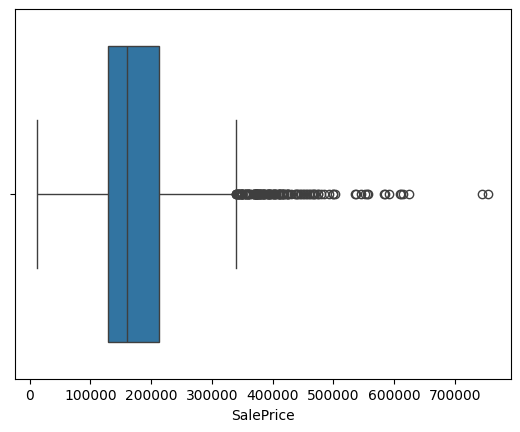

In [216]:
sns.boxplot(x = data['SalePrice'], data = data)

<Axes: xlabel='Lot Area'>

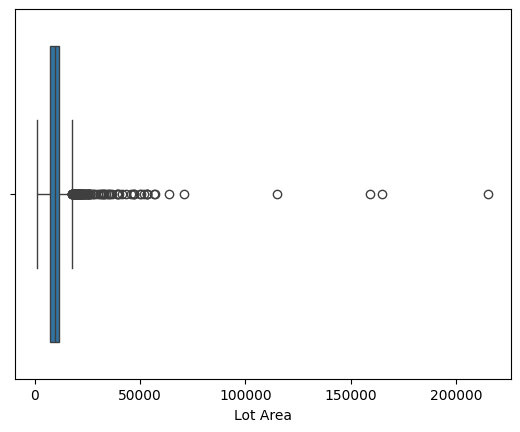

In [220]:
sns.boxplot(x = 'Lot Area', data = data)

<Axes: xlabel='Gr Liv Area', ylabel='SalePrice'>

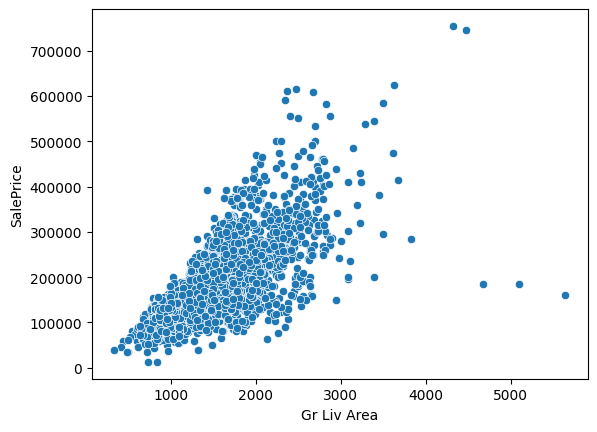

In [ ]:
sns.scatterplot(x = 'Gr Liv Area', y = 'SalePrice', data = data)
##we can observe a positive correlation between the General Living area and the price of home. 